In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
!pip install dython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully

In [3]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


### Data preparation


In [5]:
df.columns = df.columns.str.lower().str.replace(" ","_")
str_col = list(df.dtypes[df.dtypes == object].index)
for col in str_col:
    df[col] = df[col].str.lower().str.replace(" ","_")
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.5,no
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.9,no
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,no
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.6,yes


In [6]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [7]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [8]:
df.loc[pd.to_numeric(df.totalcharges, errors = "coerce").isnull(),["totalcharges","customerid"]]

,totalcharges,customerid
488,_,4472-lvygi
753,_,3115-czmzd
936,_,5709-lvoeq
1082,_,4367-nuyao
1340,_,1371-dwpaz
3331,_,7644-omvmy
3826,_,3213-vvolg
4380,_,2520-sgtta
5218,_,2923-arzlg
6670,_,4075-wkniu


In [9]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [10]:
df.totalcharges = pd.to_numeric(df.totalcharges,errors="coerce")

In [11]:
df.totalcharges.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: totalcharges, Length: 7043, dtype: bool

In [12]:
NaN_list = df.loc[df.totalcharges.isnull(),["totalcharges","customerid"]].index.tolist()

In [13]:
df.totalcharges = df.totalcharges.fillna(0)

In [14]:
df.loc[NaN_list,["totalcharges","customerid"]]

,totalcharges,customerid
488,0.0,4472-lvygi
753,0.0,3115-czmzd
936,0.0,5709-lvoeq
1082,0.0,4367-nuyao
1340,0.0,1371-dwpaz
3331,0.0,7644-omvmy
3826,0.0,3213-vvolg
4380,0.0,2520-sgtta
5218,0.0,2923-arzlg
6670,0.0,4075-wkniu


In [15]:
df.churn = (df.churn == "yes").astype("int")

### Set the datasets for training,validation,test,full train

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_test_split?

In [18]:
full_train_df,test_df = train_test_split(df,test_size=0.2,random_state=1)

In [19]:
train_df,val_df = train_test_split(full_train_df,test_size=0.25,random_state=1)

In [20]:
len(full_train_df),len(train_df),len(test_df),len(val_df)

(5634, 4225, 1409, 1409)

In [21]:
train_df.reset_index(drop=True, inplace = True)
val_df.reset_index(drop=True, inplace = True)
test_df.reset_index(drop=True, inplace = True)

In [22]:
train_df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
4221,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
4222,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
4223,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [23]:
y_train = train_df.churn.values
y_val = val_df.churn.values
y_test = test_df.churn.values



In [24]:
del train_df["churn"]
del val_df["churn"]
del test_df["churn"]

In [25]:
train_df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,yes,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,yes,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,no,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,yes,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55
4221,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,no,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80
4222,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,no,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05
4223,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95


### EDA

In [26]:
full_train_df.reset_index(drop=True, inplace = True)


**Missing values**

In [27]:
full_train_df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

No missing values.

**Distribution of the target**

In [28]:
print(full_train_df.churn.value_counts())
print()
print(full_train_df.churn.value_counts(normalize = True))


churn
0    4113
1    1521
Name: count, dtype: int64

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64


In [29]:
global_churn = full_train_df.churn.mean()
global_churn

0.26996805111821087

In [30]:
full_train_df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [31]:
full_train_df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [32]:
categorical_col = ['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']
numerical_col = ['monthlycharges','totalcharges','tenure']

In [33]:
full_train_df[categorical_col].nunique()

customerid          5634
gender                 2
seniorcitizen          2
partner                2
dependents             2
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
dtype: int64

we have not so much categories in categorical features.

### Feature importance

**Exploration: Churn rate according to categories**

In [34]:
female_churn_rate = full_train_df[full_train_df.gender == "female"].churn.mean()
female_churn_rate

0.27682403433476394

In [35]:
no_partner_churn_rate = full_train_df[full_train_df.partner == "yes"].churn.mean()
no_partner_churn_rate

0.20503330866025166

In [36]:
difference_global_female = global_churn - female_churn_rate
difference_global_female

-0.006855983216553063

In [37]:
difference_global_no_partner = global_churn - no_partner_churn_rate
difference_global_no_partner

0.06493474245795922

When difference between global churn rate & group churn rate is negative, the group in question is more likely to churn.

If it's positive, the group is less likely to churn.

In [38]:
df_group = full_train_df.groupby('gender').churn.agg(['mean','count'])
df_group["diff"] = global_churn - df_group["mean"]
df_group["risk ratio"] =  df_group["mean"] / global_churn 
df_group

,mean,count,diff,risk ratio
gender,,,,
female,0.276824,2796,-0.006856,1.025396
male,0.263214,2838,0.006755,0.974980


In [39]:
del categorical_col[0]

In [40]:
for c in categorical_col:
    df_group = full_train_df.groupby(c).churn.agg(['mean','count'])
    df_group["diff"] = global_churn - df_group["mean"]
    df_group["risk ratio"] =  df_group["mean"] / global_churn 
    display(df_group)
    print()
    print()

,mean,count,diff,risk ratio
gender,,,,
female,0.276824,2796,-0.006856,1.025396
male,0.263214,2838,0.006755,0.974980


,mean,count,diff,risk ratio
seniorcitizen,,,,
0,0.242270,4722,0.027698,0.897403
1,0.413377,912,-0.143409,1.531208


,mean,count,diff,risk ratio
partner,,,,
no,0.329809,2932,-0.059841,1.221659
yes,0.205033,2702,0.064935,0.759472


,mean,count,diff,risk ratio
dependents,,,,
no,0.313760,3968,-0.043792,1.162212
yes,0.165666,1666,0.104302,0.613651


,mean,count,diff,risk ratio
phoneservice,,,,
no,0.241316,547,0.028652,0.893870
yes,0.273049,5087,-0.003081,1.011412


,mean,count,diff,risk ratio
multiplelines,,,,
no,0.257407,2700,0.012561,0.953474
no_phone_service,0.241316,547,0.028652,0.893870
yes,0.290742,2387,-0.020773,1.076948


,mean,count,diff,risk ratio
internetservice,,,,
dsl,0.192347,1934,0.077621,0.712482
fiber_optic,0.425171,2479,-0.155203,1.574895
no,0.077805,1221,0.192163,0.288201


,mean,count,diff,risk ratio
onlinesecurity,,,,
no,0.420921,2801,-0.150953,1.559152
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.153226,1612,0.116742,0.567570


,mean,count,diff,risk ratio
onlinebackup,,,,
no,0.404323,2498,-0.134355,1.497672
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.217232,1915,0.052736,0.804660


,mean,count,diff,risk ratio
deviceprotection,,,,
no,0.395875,2473,-0.125907,1.466379
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.230412,1940,0.039556,0.853480


,mean,count,diff,risk ratio
techsupport,,,,
no,0.418914,2781,-0.148946,1.551717
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.159926,1632,0.110042,0.592390


,mean,count,diff,risk ratio
streamingtv,,,,
no,0.342832,2246,-0.072864,1.269897
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.302723,2167,-0.032755,1.121328


,mean,count,diff,risk ratio
streamingmovies,,,,
no,0.338906,2213,-0.068938,1.255358
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.307273,2200,-0.037305,1.138182


,mean,count,diff,risk ratio
contract,,,,
month-to-month,0.431701,3104,-0.161733,1.599082
one_year,0.120573,1186,0.149395,0.446621
two_year,0.028274,1344,0.241694,0.104730


,mean,count,diff,risk ratio
paperlessbilling,,,,
no,0.172071,2313,0.097897,0.637375
yes,0.338151,3321,-0.068183,1.252560


,mean,count,diff,risk ratio
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,0.101797,0.622928
credit_card_(automatic),0.164339,1217,0.105630,0.608733
electronic_check,0.455890,1893,-0.185922,1.688682
mailed_check,0.193870,1305,0.076098,0.718121


### Dependency between categorical features & target : Mutual information

In [41]:
from sklearn.metrics import mutual_info_score

In [42]:
mutual_info_score(full_train_df.gender,full_train_df.churn)

0.0001174846211139946

In [43]:
mutual_info_score(full_train_df.paymentmethod,full_train_df.churn)

0.043210027531582915

In [44]:
def mutual_info_features(series):
    return mutual_info_score(series,full_train_df.churn)

In [45]:
full_train_df[categorical_col].apply(mutual_info_features)

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [46]:
full_train_df[numerical_col]

,monthlycharges,totalcharges,tenure
0,19.70,258.35,12
1,73.90,3160.55,42
2,65.15,4681.75,71
3,85.45,6300.85,71
4,70.40,2044.75,30
...,...,...,...
5629,100.50,918.60,9
5630,19.95,1189.90,60
5631,105.70,2979.50,28
5632,54.40,114.10,2


### feature importance: numerical features

In [47]:
full_train_df[numerical_col].corrwith(full_train_df.churn)

monthlycharges    0.196805
totalcharges     -0.196353
tenure           -0.351885
dtype: float64

**Tenure variable**

In [48]:
full_train_df.tenure.describe()

count    5634.000000
mean       32.277955
std        24.555211
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [49]:
full_train_df[(full_train_df.tenure < 2)].churn.mean()

0.6247464503042597

In [50]:
full_train_df[(full_train_df.tenure > 2)&(full_train_df.tenure < 5)].churn.mean()

0.4694533762057878

In [51]:
full_train_df[(full_train_df.tenure > 5)&(full_train_df.tenure < 25)].churn.mean()

0.32515337423312884

In [52]:
full_train_df[full_train_df.tenure > 55].churn.mean()

0.07874015748031496

example of negative correlation: tenure rises, churn decreases.

**monthlycharges feature**

In [53]:
full_train_df.monthlycharges.describe()

count    5634.000000
mean       64.779127
std        30.104993
min        18.250000
25%        35.400000
50%        70.375000
75%        89.850000
max       118.650000
Name: monthlycharges, dtype: float64

In [54]:
full_train_df[(full_train_df.monthlycharges < 35)].churn.mean()

0.11286843997124371

In [55]:
full_train_df[(full_train_df.monthlycharges > 90)].churn.mean()

0.3321351545650611

Example of positive correlation: More the monthly charges rises and more the churn is high.

Correlation

In [56]:
from dython.nominal import associations

In [57]:
associations?

/usr/local/lib/python3.11/dist-packages/dython/nominal.py:166: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/dython/nominal.py:166: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/dython/nominal.py:166: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/dython/nominal.py:166: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  war

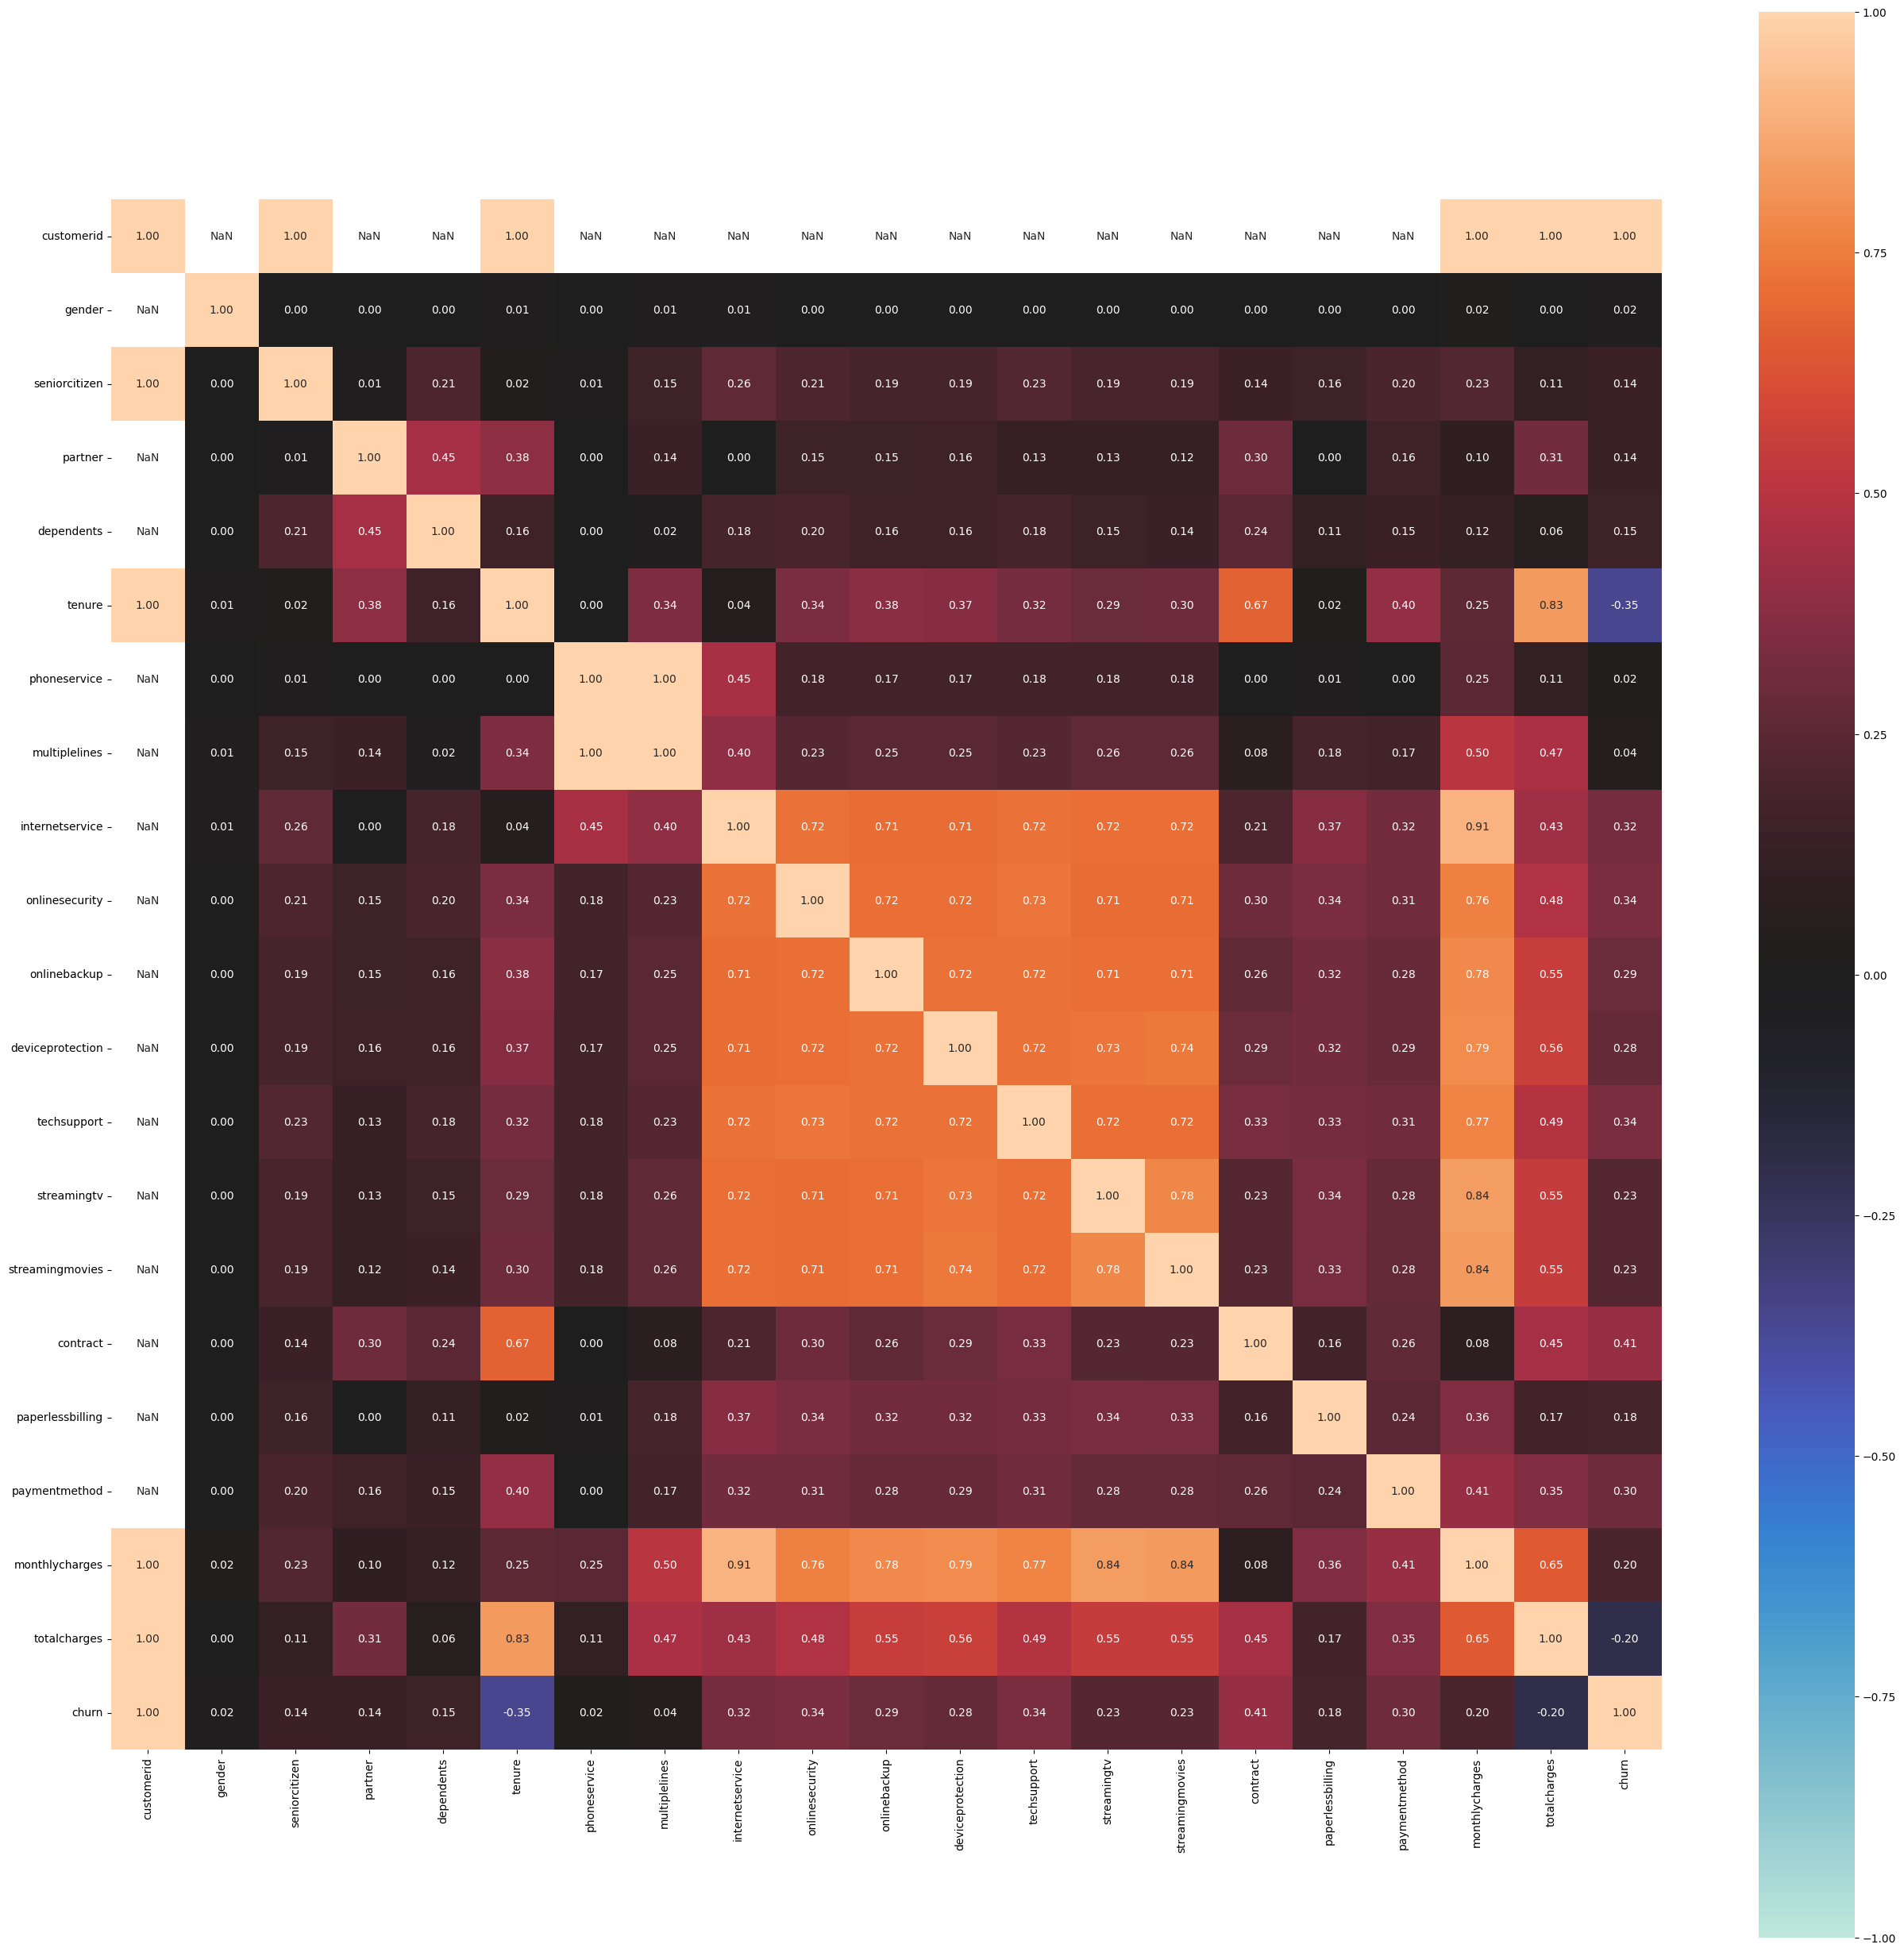

{'corr':                   customerid    gender  seniorcitizen   partner  dependents  \
 customerid               1.0  0.000000       1.000000  0.000000    0.000000   
 gender                   0.0  1.000000       0.000579  0.000000    0.000000   
 seniorcitizen            1.0  0.000579       1.000000  0.012169    0.208738   
 partner                  0.0  0.000000       0.012169  1.000000    0.450999   
 dependents               0.0  0.000000       0.208738  0.450999    1.000000   
 tenure                   1.0  0.008909       0.023443  0.383123    0.161319   
 phoneservice             0.0  0.000000       0.013908  0.000000    0.000000   
 multiplelines            0.0  0.012535       0.154676  0.144716    0.015381   
 internetservice          0.0  0.009881       0.264745  0.000000    0.183512   
 onlinesecurity           0.0  0.000000       0.210664  0.150819    0.195110   
 onlinebackup             0.0  0.004438       0.186781  0.150029    0.162777   
 deviceprotection         0.0  0

In [58]:
associations(full_train_df, plot=True)


### One-Hot Encoding

In [59]:
train_dict = train_df[categorical_col + numerical_col].to_dict(orient= "records")

In [60]:
from sklearn.feature_extraction import DictVectorizer

In [61]:
dv = DictVectorizer(sparse = False)

In [62]:
train_dict[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'monthlycharges': 115.5,
 'totalcharges': 8425.15,
 'tenure': 72}

In [63]:
X_train = dv.fit_transform(train_dict)

In [64]:
dv.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [65]:
X_train.shape

(4225, 45)

In [66]:
val_dict = val_df[categorical_col + numerical_col].to_dict(orient= "records")

In [67]:
X_val = dv.transform(val_dict)

In [68]:
X_val.shape

(1409, 45)

### LOgistic Regression

In [69]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [70]:
z = np.linspace(-5,5,51)

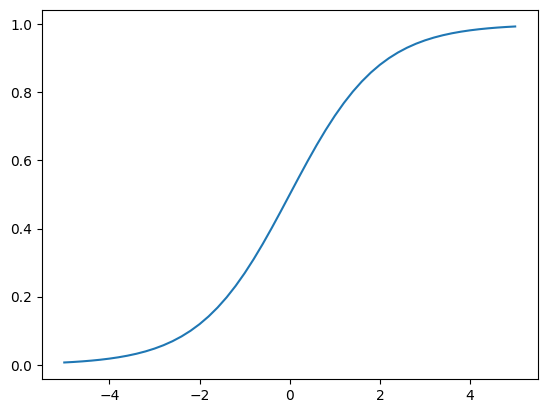

In [71]:
plt.plot(z,sigmoid(z))

In [72]:
def linear_regression(xi,w):
    result = w0
    for j in range(len(w)):
        result = result + xi[j] * w[j]
    return result  

def logistic_regression(xi,w):
    result = w0
    for j in range(len(w)):
        result = result + xi[j] * w[j]
    return sigmoid(result)  


### TRaining a Logistic Regression with Scikit Learn

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [75]:
model.coef_

array([[ 4.74368506e-01, -1.74691234e-01, -4.07247923e-01,
        -2.96880723e-02, -7.78825795e-02,  6.26136007e-02,
        -8.88880300e-02, -8.12962226e-02, -3.42720560e-02,
        -7.32985959e-02, -3.34890785e-01,  3.16208163e-01,
        -8.88880300e-02,  3.66937937e-03, -2.57869774e-01,
         1.41344026e-01,  8.95509590e-03,  6.24623031e-02,
        -8.88880300e-02, -8.11449250e-02,  2.65303590e-01,
        -8.88880300e-02, -2.83986211e-01, -2.30934891e-01,
         1.23364239e-01, -1.65875494e-01,  5.83048418e-02,
        -8.69253261e-02, -3.20140314e-02,  7.03518611e-02,
        -5.89831555e-02,  1.41344026e-01, -2.48914678e-01,
         2.15265419e-01, -1.20252121e-01, -8.88880300e-02,
         1.01569499e-01, -7.08251452e-02, -8.88880300e-02,
         5.21425233e-02,  2.13128976e-01, -8.88880300e-02,
        -2.31811598e-01, -7.03481076e-02,  3.82129188e-04]])

In [76]:
model.intercept_

array([-0.108925])

In [77]:
y_pred = model.predict_proba(X_val)[:,1]

In [78]:
y_pred

array([0.00903547, 0.20475906, 0.21244714, ..., 0.13659691, 0.79950919,
       0.8371482 ])

In [79]:
churn_decision = (y_pred >= 0.5)

In [80]:
val_df[churn_decision]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
11,2637-fkfsy,female,0,yes,no,3,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,46.10,130.15
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,5976-jcjrh,male,0,yes,no,10,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.30,738.20
1398,2034-cgrhz,male,1,no,no,24,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,credit_card_(automatic),102.95,2496.70
1399,5276-kqwhg,female,1,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,69.60,131.65
1407,6521-yytyi,male,0,no,yes,1,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,93.30,93.30


### Compare predictions & real churn

In [81]:
accuracy = (churn_decision == y_val).mean()

### MOdel interpretation

In [82]:
dict(zip(dv.feature_names_,model.coef_[0].round(3)))

{'contract=month-to-month': 0.474,
 'contract=one_year': -0.175,
 'contract=two_year': -0.407,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.062,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.265,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.123,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [83]:
small = ["monthlycharges","tenure","contract"]

In [84]:
dict_train_small = train_df[small].to_dict(orient="records")
dict_val_small = val_df[small].to_dict(orient="records")

In [85]:
dv_small = DictVectorizer()
dv_small.fit(dict_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,True
,sort,True


In [86]:
dv_small.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [87]:
X_train_small = dv_small.transform(dict_train_small)

In [88]:
model_small = LogisticRegression()
model_small.fit(X_train_small,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [89]:
w0 = model_small.intercept_[0]
w = model_small.coef_[0]

In [90]:
w0,w

(-2.4779575953865236,
 array([ 0.9711394 , -0.02379507, -0.94828863,  0.02748534, -0.03619005]))

In [91]:
dict(zip(dv_small.feature_names_,model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.971,
 'contract=one_year': -0.024,
 'contract=two_year': -0.948,
 'monthlycharges': 0.027,
 'tenure': -0.036}

### Train and using the final model

In [92]:
dict_full_train = full_train_df[categorical_col+numerical_col].to_dict(orient= 'records')

In [93]:
dict_full_train[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'no',
 'onlinesecurity': 'no_internet_service',
 'onlinebackup': 'no_internet_service',
 'deviceprotection': 'no_internet_service',
 'techsupport': 'no_internet_service',
 'streamingtv': 'no_internet_service',
 'streamingmovies': 'no_internet_service',
 'contract': 'two_year',
 'paperlessbilling': 'no',
 'paymentmethod': 'mailed_check',
 'monthlycharges': 19.7,
 'totalcharges': 258.35,
 'tenure': 12}

In [94]:
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(dict_full_train)

In [95]:
X_full_train.shape

(5634, 45)

In [96]:
y_full_train = full_train_df.churn.values

In [97]:
model = LogisticRegression()
model.fit(X_full_train,y_full_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [98]:
dict_test = test_df[categorical_col+numerical_col].to_dict(orient= 'records')
X_test = dv.transform(dict_test)

In [99]:
X_test.shape

(1409, 45)

In [100]:
y_pred = model.predict_proba(X_test)[:,1]
y_pred

array([0.05683659, 0.13113586, 0.32220728, ..., 0.00624872, 0.18986267,
       0.66078309])

In [101]:
churn_decision = (y_pred >= 0.5)

In [102]:
(churn_decision == y_test).astype("int").mean()

0.8126330731014905

**How to use the model: take a random customer**

In [103]:
dict_test[98]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'monthlycharges': 87.0,
 'totalcharges': 1850.65,
 'tenure': 22}

In [104]:
X_customer_98 = dv.transform(dict_test[98])

In [105]:
X_customer_98.shape

(1, 45)

In [106]:
(model.predict_proba(X_customer_98)[:,1] >= 0.5).astype("int") == y_test[98]

array([ True])

Good prediction

### Accuracy, Threshold, Measures of evaluation of models

In [107]:
thresholds = np.linspace(0,1,21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [108]:
accuracies = []
y_pred = model.predict_proba(X_val)[:,1]
for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    accuracies.append(score)
    print("%.2f %.3f" %(t,score))


0.00 0.274
0.05 0.505
0.10 0.600
0.15 0.664
0.20 0.725
0.25 0.749
0.30 0.766
0.35 0.777
0.40 0.794
0.45 0.798
0.50 0.805
0.55 0.815
0.60 0.806
0.65 0.789
0.70 0.778
0.75 0.745
0.80 0.737
0.85 0.727
0.90 0.726
0.95 0.726
1.00 0.726


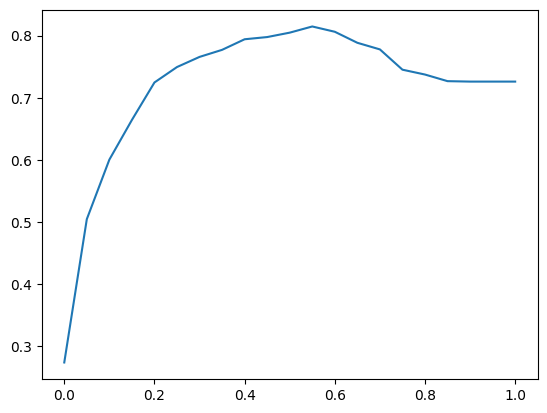

In [109]:
plt.plot(thresholds,accuracies)

This curve give us a lot of informations.

When we ajust the threshold to 1 for a dummy model, we see that accuracy is always 72%, it means that 72% of the predictions give False & it matches with the 0(Non-churners) of the validation target.

We have an imbalanced target and accuracy is not the good metric for this situation.

In [110]:
from collections import Counter

In [111]:
Counter(y_pred>=1)

Counter({False: 1409})

In [112]:
Counter(y_val)

Counter({0: 1023, 1: 386})

Proof is here

### COnfusion table

In [113]:
t = 0.5
actual_positive = y_val == 1
actual_negative = y_val == 0
positive_class = y_pred >= t
negative_class = y_pred < t

tp = (actual_positive & positive_class).sum()
tn = (actual_negative & negative_class).sum()
fp = (actual_negative & positive_class).sum()
fn = (actual_positive & negative_class).sum()

print(tp,tn,fp,fn)

216 918 105 170


In [114]:
confusion_matrix = np.array([[tn,fp],[fn,tp]])
confusion_matrix

array([[918, 105],
       [170, 216]])

In [115]:
confusion_matrix/confusion_matrix.sum()

array([[0.6515259 , 0.07452094],
       [0.12065295, 0.15330021]])

In [116]:
accuracy_val = (tp + tn)/confusion_matrix.sum()
accuracy

0.8034066713981547

### Precision & Recall

**Precision is the fraction of correct positive predictions(True Positive) on the sum of all predictions from the positive class.(True Positive & False Positive)what it gives us:**

$$Precision = \frac{TP}{TP + FP}$$




In [117]:
precision = tp/(tp+fp)
precision

0.6728971962616822

In our case, it reveals the percentage of people that received an email and who wanted to churn.

its reveals too that 33% of people from our predictions received an offer whereas they didn't want to churn.

It don't seem to be a good result. We want to send an email to customers who really wants to churn.

It's clearly a measure to maximize for not spending money.

**Recall is the fraction of correct positive predictions on the the sum of all positive observations(real examples)**

$$Recall = \frac{TP}{TP + FN}$$

- TP being real positive observations well classified
- FN being real positive observations misclassified


In [118]:
recall = tp/(tp+fn)
recall

0.5595854922279793

In our case, it reveals the percentage of well classified churners, the ability from our model to detect churners.

Find all churners could be useful to avoid a part of them to leave, the company needs customers to work. A good offer can retain them.

**So for a good model, we should find a compromise between a good precision and a good recall.There are curves for that.**

### ROC CUrves

#### True Positive Rate & False Positive Rate

In [119]:
fpr = fp/(fp+tn)
fpr

0.10263929618768329

In [120]:
thresholds = np.linspace(0,1,101)
scores = []
#We calculate a bunch of scores for each thresholds to be able to build a curve between different measures
for t in thresholds:
    actual_positive = y_val == 1
    actual_negative = y_val == 0
    positive_class = y_pred >= t
    negative_class = y_pred < t
    
    tp = (actual_positive & positive_class).sum()
    tn = (actual_negative & negative_class).sum()
    fp = (actual_negative & positive_class).sum()
    fn = (actual_positive & negative_class).sum()

    scores.append((t,tp,tn,fn,fp))

In [121]:
columns = ["thresholds","tp","tn","fn","fp"]
df_scores = pd.DataFrame(scores,columns = columns)
df_scores

,thresholds,tp,tn,fn,fp
0,0.00,386,0,0,1023
1,0.01,385,100,1,923
2,0.02,384,182,2,841
3,0.03,383,250,3,773
4,0.04,382,297,4,726
...,...,...,...,...,...
96,0.96,0,1023,386,0
97,0.97,0,1023,386,0
98,0.98,0,1023,386,0
99,0.99,0,1023,386,0


In [122]:
df_scores["tpr"] = df_scores.tp/(df_scores.tp + df_scores.fn)
df_scores["fpr"] = df_scores.fp/(df_scores.fp + df_scores.tn)
df_scores

,thresholds,tp,tn,fn,fp,tpr,fpr
0,0.00,386,0,0,1023,1.000000,1.000000
1,0.01,385,100,1,923,0.997409,0.902248
2,0.02,384,182,2,841,0.994819,0.822092
3,0.03,383,250,3,773,0.992228,0.755621
4,0.04,382,297,4,726,0.989637,0.709677
...,...,...,...,...,...,...,...
96,0.96,0,1023,386,0,0.000000,0.000000
97,0.97,0,1023,386,0,0.000000,0.000000
98,0.98,0,1023,386,0,0.000000,0.000000
99,0.99,0,1023,386,0,0.000000,0.000000


In [123]:
df_scores[::10]

,thresholds,tp,tn,fn,fp,tpr,fpr
0,0.0,386,0,0,1023,1.000000,1.000000
10,0.1,367,479,19,544,0.950777,0.531769
20,0.2,335,686,51,337,0.867876,0.329423
30,0.3,295,784,91,239,0.764249,0.233627
40,0.4,260,859,126,164,0.673575,0.160313
50,0.5,216,918,170,105,0.559585,0.102639
60,0.6,163,973,223,50,0.422280,0.048876
70,0.7,91,1005,295,18,0.235751,0.017595
80,0.8,18,1021,368,2,0.046632,0.001955
90,0.9,0,1023,386,0,0.000000,0.000000


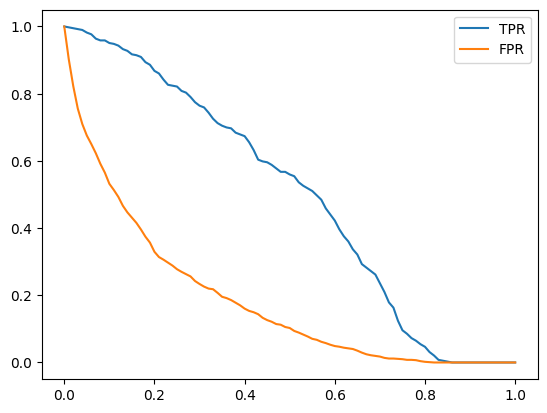

In [124]:
plt.plot(df_scores.thresholds,df_scores["tpr"],label = 'TPR')
plt.plot(df_scores.thresholds,df_scores["fpr"],label = 'FPR')
plt.legend()


### Random model

In [125]:
np.random.seed(1)
y_rand = np.random.uniform(0,1,size = len(y_val))
((y_rand >= 0.5) == y_val).mean()


0.5017743080198722

In [126]:
def tpr_fpr_dataframe(y_val,y_pred):
    thresholds = np.linspace(0,1,101)
    scores = []
    #We calculate a bunch of scores for each thresholds to be able to build a curve between different measures
    for t in thresholds:
        actual_positive = y_val == 1
        actual_negative = y_val == 0
        positive_class = y_pred >= t
        negative_class = y_pred < t
        
        tp = (actual_positive & positive_class).sum()
        tn = (actual_negative & negative_class).sum()
        fp = (actual_negative & positive_class).sum()
        fn = (actual_positive & negative_class).sum()
    
        scores.append((t,tp,tn,fn,fp))
        
    columns = ["thresholds","tp","tn","fn","fp"]
    df_scores = pd.DataFrame(scores,columns = columns)
    df_scores["tpr"] = df_scores.tp/(df_scores.tp + df_scores.fn)
    df_scores["fpr"] = df_scores.fp/(df_scores.fp + df_scores.tn)
    return df_scores

In [127]:
df_rand = tpr_fpr_dataframe(y_val,y_rand)
df_rand

,thresholds,tp,tn,fn,fp,tpr,fpr
0,0.00,386,0,0,1023,1.000000,1.000000
1,0.01,382,10,4,1013,0.989637,0.990225
2,0.02,379,30,7,993,0.981865,0.970674
3,0.03,375,44,11,979,0.971503,0.956989
4,0.04,372,54,14,969,0.963731,0.947214
...,...,...,...,...,...,...,...
96,0.96,14,982,372,41,0.036269,0.040078
97,0.97,11,987,375,36,0.028497,0.035191
98,0.98,8,1004,378,19,0.020725,0.018573
99,0.99,6,1016,380,7,0.015544,0.006843


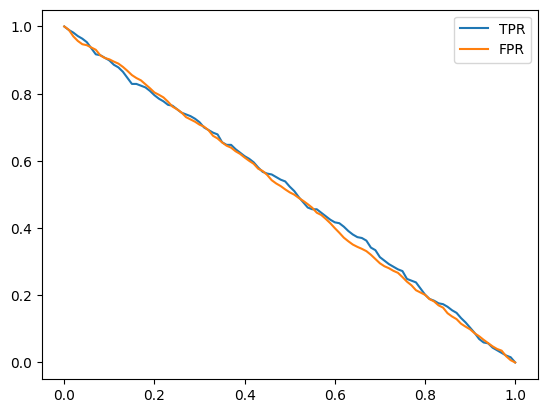

In [128]:
plt.plot(df_rand.thresholds,df_rand["tpr"],label = 'TPR')
plt.plot(df_rand.thresholds,df_rand["fpr"],label = 'FPR')
plt.legend()


### Ideal model

In [129]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.repeat([0,1],[num_neg,num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [130]:
y_ideal_pred = np.linspace(0,1,len(y_val))
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [131]:
df_ideal = tpr_fpr_dataframe(y_ideal,y_ideal_pred)
df_ideal[::10]

,thresholds,tp,tn,fn,fp,tpr,fpr
0,0.0,386,0,0,1023,1.000000,1.000000
10,0.1,386,141,0,882,1.000000,0.862170
20,0.2,386,282,0,741,1.000000,0.724340
30,0.3,386,423,0,600,1.000000,0.586510
40,0.4,386,564,0,459,1.000000,0.448680
50,0.5,386,704,0,319,1.000000,0.311828
60,0.6,386,845,0,178,1.000000,0.173998
70,0.7,386,986,0,37,1.000000,0.036168
80,0.8,282,1023,104,0,0.730570,0.000000
90,0.9,141,1023,245,0,0.365285,0.000000


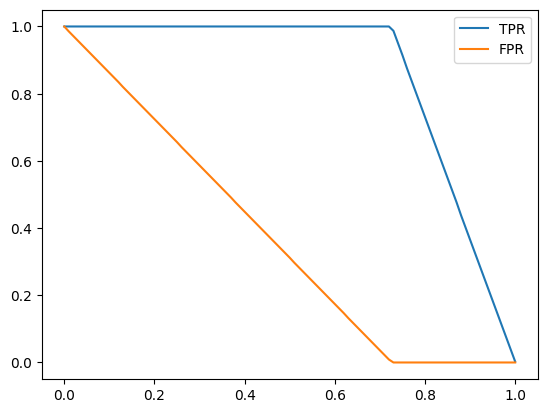

In [132]:
plt.plot(df_ideal.thresholds,df_ideal["tpr"],label = 'TPR')
plt.plot(df_ideal.thresholds,df_ideal["fpr"],label = 'FPR')
plt.legend()


### All models together

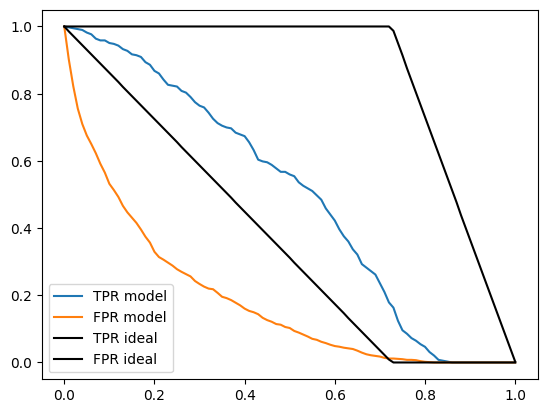

In [133]:
plt.plot(df_scores.thresholds,df_scores["tpr"],label = 'TPR model')
plt.plot(df_scores.thresholds,df_scores["fpr"],label = 'FPR model')
#plt.plot(df_rand.thresholds,df_rand["tpr"],label = 'TPR')
#plt.plot(df_rand.thresholds,df_rand["fpr"],label = 'FPR')
plt.plot(df_ideal.thresholds,df_ideal["tpr"],label = 'TPR ideal',color="black")
plt.plot(df_ideal.thresholds,df_ideal["fpr"],label = 'FPR ideal',color="black")
plt.legend()


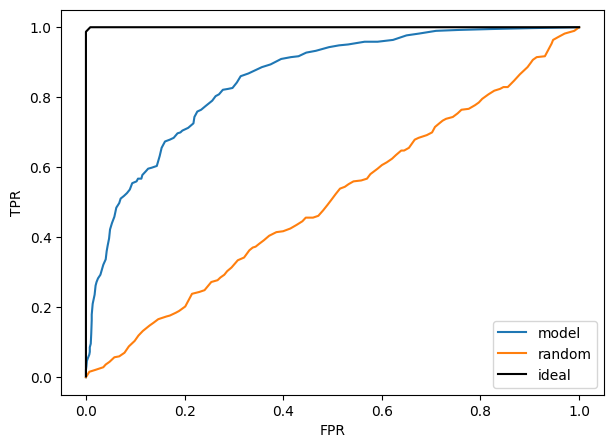

In [134]:
plt.figure(figsize=(7,5))
plt.plot(df_scores["fpr"],df_scores["tpr"],label = 'model')
plt.plot(df_rand["fpr"],df_rand["tpr"],label = 'random')
plt.plot(df_ideal["fpr"],df_ideal["tpr"],label = 'ideal',color="black")
plt.xlabel("FPR")
plt.ylabel("TPR")

plt.legend()


**With Scikit-Learn**

In [135]:
from sklearn.metrics import roc_curve

In [136]:
fpr,tpr,thresholds = roc_curve(y_val,y_pred)

In [137]:
pd.DataFrame({"fpr":fpr,"tpr":tpr,"thresholds":thresholds})

,fpr,tpr,thresholds
0,0.000000,0.000000,inf
1,0.000000,0.002591,0.851585
2,0.000000,0.028497,0.812197
3,0.000978,0.028497,0.812136
4,0.000978,0.044041,0.803793
...,...,...,...
368,0.868035,0.994819,0.014269
369,0.868035,0.997409,0.013933
370,0.913001,0.997409,0.008873
371,0.913001,1.000000,0.008867


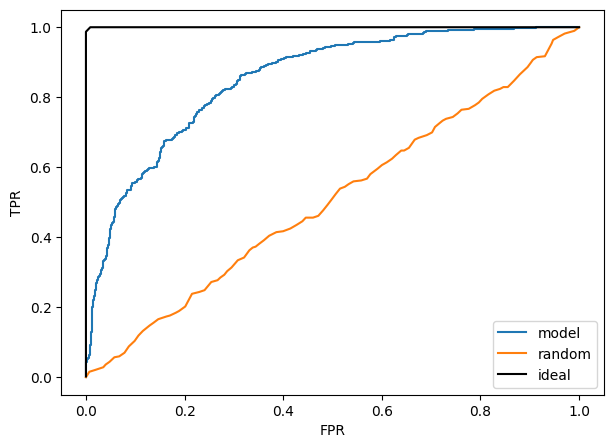

In [138]:
plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,label = 'model')
plt.plot(df_rand["fpr"],df_rand["tpr"],label = 'random')
plt.plot(df_ideal["fpr"],df_ideal["tpr"],label = 'ideal',color="black")
plt.xlabel("FPR")
plt.ylabel("TPR")

plt.legend()

### ROC AUC

In [139]:
from sklearn.metrics import auc

In [140]:
auc(fpr,tpr)

0.8518200558147073

In [141]:
auc(df_scores.fpr,df_scores.tpr)

0.851511099630772

In [142]:
auc(df_ideal.fpr,df_ideal.tpr)

0.9999430203759136

In [143]:
from sklearn.metrics import roc_auc_score

In [144]:
roc_auc_score(y_val,y_pred)

0.8518200558147073

### Practical implementation of AUC Score

**The AUC Score is mathematically the probability that a randomly selected positive observation has a higher prediction score than a randomly selected negative observation.**

$$AUC=P(s(x+)>s(x−))$$

In [145]:
pos = y_pred[y_val==1]
neg = y_pred[y_val==0]
len(neg),len(pos)

(1023, 386)

In [146]:
import random

In [147]:
success = 0
n = 1_000_000

for i in range(n):
    pos_idx = random.randint(0,len(pos)- 1)
    neg_idx = random.randint(0,len(neg)- 1)

    if pos[pos_idx] > neg[neg_idx]:
       success = success + 1

success/n

0.852153

**WIth NUmpy**

In [148]:
n = 1_000_000

random.seed(1)

pos_idx = np.random.randint(0,len(pos),size = n)
neg_idx = np.random.randint(0,len(neg),size = n)

(pos[pos_idx] > neg[neg_idx]).mean()

0.851669

### Cross-Validation

In [149]:
def train(df_train,y_train,C = 1.0):
    
    dicts = df_train[categorical_col + numerical_col].to_dict(orient = 'records')

    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C = C,max_iter = 5000)
    model.fit(X_train,y_train)

    return dv,model

In [150]:
dv,model = train(train_df,y_train)

In [151]:
def predict(df_val,dv,model):
    
    dicts_val = df_val[categorical_col + numerical_col].to_dict(orient = 'records')
    X_val = dv.transform(dicts_val)
    y_pred = model.predict_proba(X_val)[:,1]

    return y_pred
    

In [152]:
y_pred = predict(val_df,dv,model)

In [153]:
from sklearn.model_selection import KFold

In [154]:
kfold = KFold(n_splits = 10, shuffle=True,random_state=1)

In [155]:
train_idx,val_idx = next(kfold.split(full_train_df))

In [156]:
df_train = full_train_df.iloc[train_idx]
df_val = full_train_df.iloc[val_idx]

In [157]:
!pip install tqdm

In [158]:
from tqdm.auto import tqdm

In [159]:
n_splits = 10

for C in [0.001,0.01,0.1,0.5,1,5,10,100]:
    scores = []
    kfold = KFold(n_splits = n_splits, shuffle=True,random_state=1)
    for train_idx,val_idx \
                in tqdm(kfold.split(full_train_df),total = n_splits):
        
        df_train = full_train_df.iloc[train_idx]
        df_val = full_train_df.iloc[val_idx]
    
        y_train = df_train.churn.values
        y_val = df_val.churn.values
    
        dv,model = train(df_train,y_train,C=C)
        y_pred = predict(df_val,dv,model)
    
        auc = roc_auc_score(y_val,y_pred)
        scores.append(auc)
    print('%s %.3f +- %.3f' % (C,np.mean(scores),np.std(scores)))

  0%|          | 0/10 [00:00<?, ?it/s]

0.001 0.826 +- 0.012


  0%|          | 0/10 [00:00<?, ?it/s]

0.01 0.841 +- 0.012


  0%|          | 0/10 [00:00<?, ?it/s]

0.1 0.842 +- 0.012


  0%|          | 0/10 [00:00<?, ?it/s]

0.5 0.843 +- 0.012


  0%|          | 0/10 [00:00<?, ?it/s]

1 0.843 +- 0.012


  0%|          | 0/10 [00:00<?, ?it/s]

5 0.842 +- 0.012


  0%|          | 0/10 [00:00<?, ?it/s]

10 0.842 +- 0.012


  0%|          | 0/10 [00:00<?, ?it/s]

100 0.842 +- 0.011


In [160]:
dv,model = train(full_train_df,full_train_df.churn.values,C=0.5)
y_pred = predict(test_df,dv,model)

roc_score = roc_auc_score(y_test,y_pred)
roc_score

0.8583544584917722